# Face Tracking, Recognition

In [1]:
# Modules
import cv2
import dlib
import face_recognition
import cvlib
import matplotlib.pyplot as plt
import numpy as np
import winsound

In [2]:
# Print versions of these packages
print("CV2 - ", cv2.__version__)
print("dlib - ", dlib.__version__)
print("face recognition - ", face_recognition.__version__)
print("cvlib - ", cvlib.__version__)

CV2 -  4.4.0
dlib -  19.7.0
face recognition -  1.2.3
cvlib -  0.2.5


In [3]:
# SOurce for the XML files
source = cv2.data.haarcascades

In [4]:
# Save figure function 
def save_fig(name, extension="png"):
    path = "./face_recognition_images/"
    plt.savefig(path+name+"."+extension)

In [5]:
# The show function 
def show_detection(show_image, faces):
    """This function draws rectangles around the detected faces"""
    for (x, y, w, h) in faces:
        cv2.rectangle(show_image,(x, y), (x+w,y+h ), (255, 0, 0), 3)
    return show_image

## Face Detection 
Face detection can be achieved in some different ways - 1) Using the face_recognition library, 2) Using the dlib library 3) Using the OpenCV 4) Using the cvlib library

## OpenCV Face Detection

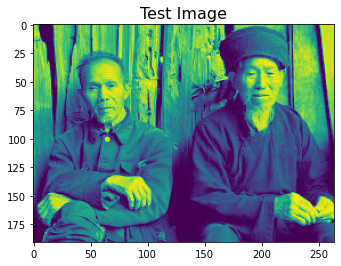

In [6]:
# loading the images
image = cv2.imread("images/test1.jpg", 0)
plt.imshow(image)
plt.title("Test Image", fontsize = 16)
save_fig("CV2_reading_image")

In [7]:
# First step 
# Cascading Classifiers from files 
alt_2 = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_alt2.xml")
default = cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_frontalface_default.xml")

In [8]:
# Detecting faces in the test image
# Test image
alt_2_detections = alt_2.detectMultiScale(image)
default_detections = default.detectMultiScale(image)

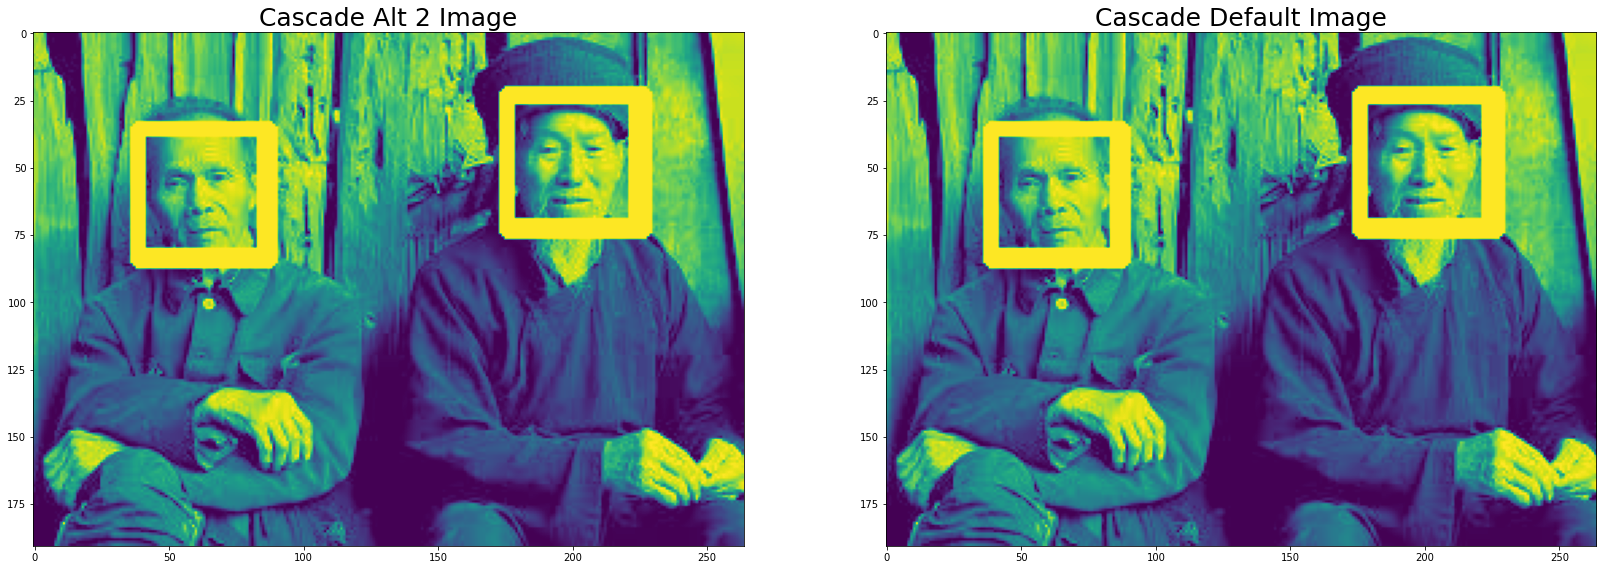

In [9]:
# Showing detections 
alt_image = show_detection(image, alt_2_detections)
default_image = show_detection(image, default_detections)
detections = [alt_image, default_image]
names = ["Cascade Alt 2 Image", "Cascade Default Image"]
plt.figure(figsize =(28, 15))
for i in range(2):
    ax = plt.subplot(1, 2, i+1)
    ax.imshow(detections[i])
    ax.set_title(names[i], fontsize = 25)
save_fig("Cascade Images")

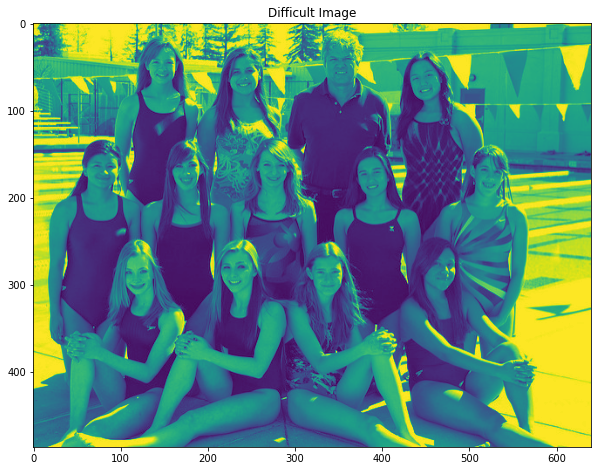

<Figure size 432x288 with 0 Axes>

In [10]:
# COnducting a more difficult test
image2 = cv2.imread("images/test2.jpg", 0)
plt.figure(figsize = (10, 8))
plt.imshow(image2)
plt.title("Difficult Image")
plt.show()
save_fig("Difficult Test")

In [11]:
# Intializing Haar Cascade Classifiers
source = cv2.data.haarcascades
alt_cascade_classifier = cv2.CascadeClassifier(source+"haarcascade_frontalface_alt2.xml")
default_cascade_classifier = cv2.CascadeClassifier(source+"haarcascade_frontalface_default.xml")

In [12]:
# Detecting faces
alt_faces = alt_cascade_classifier.detectMultiScale(image2)
default_faces = default_cascade_classifier.detectMultiScale(image2)

In [13]:
# Showing the faces
alt_many = show_detection(image2.copy(), alt_faces)
default_many = show_detection(image2.copy(), default_faces)

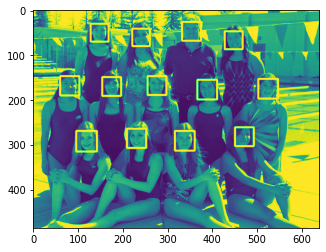

In [14]:
plt.imshow(alt_many)
save_fig("multiple_face_detection")

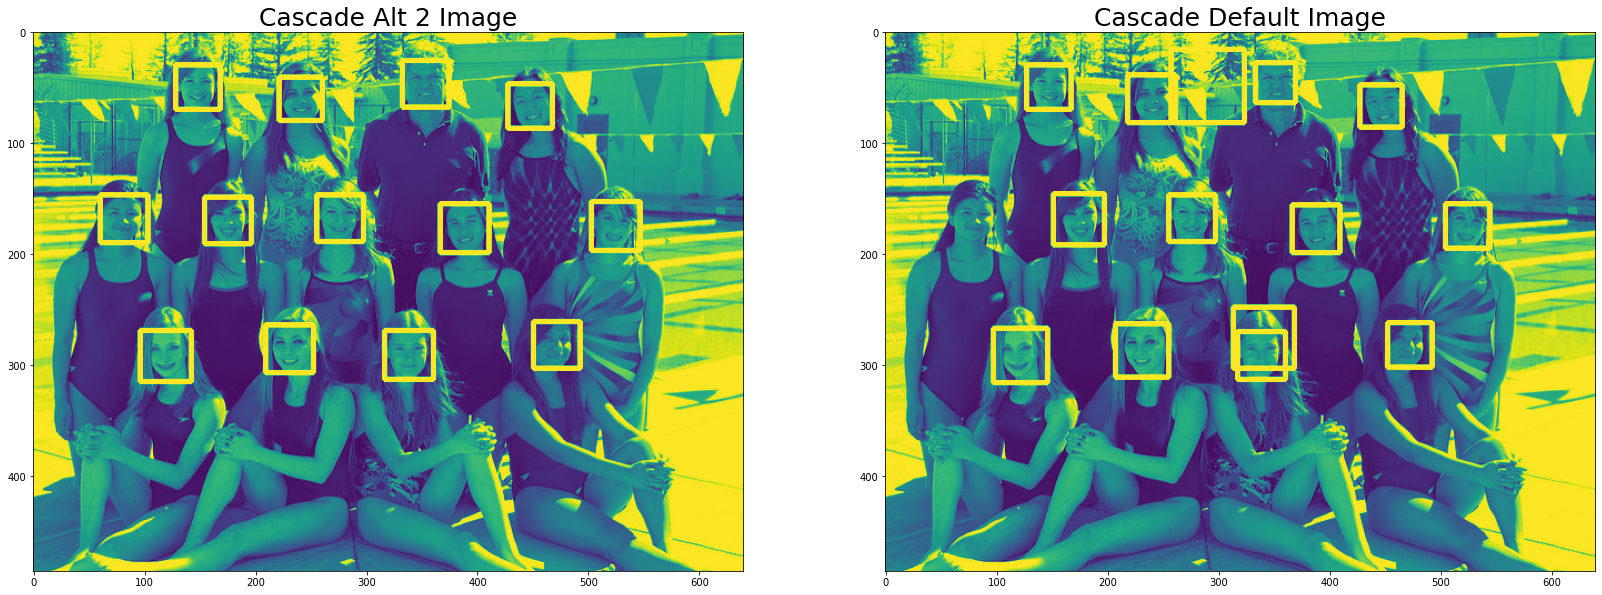

In [15]:
# Showing the images
detections = [alt_many, default_many]
names = ["Cascade Alt 2 Image", "Cascade Default Image"]
plt.figure(figsize =(28, 15))
for i in range(2):
    ax = plt.subplot(1, 2, i+1)
    ax.imshow(detections[i])
    ax.set_title(names[i], fontsize = 25)
save_fig("multiple_face_detection_cascade")

Almost similar performance, but for this specific case, the alt2 works better

In [16]:
# CV2 getFacesHAAR
# This function requires a BGR input
# For this, reinstall the opencv-contrib-python package!

### Detecting lower body 

In [17]:
# reading image
human_template = cv2.imread("images/human_template.png", 0)
human_template.shape

(233, 216)

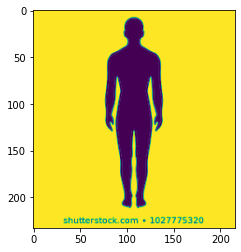

In [18]:
plt.imshow(human_template)

In [19]:
# Building the compilers
lower_body_cascade = cv2.CascadeClassifier(source+"haarcascade_lowerbody.xml")

In [20]:
# Detecing using the cascade
LowerBodyDetection=lower_body_cascade.detectMultiScale(human_template)

In [21]:
LowerBodyDetection

array([[ 59, 113,  93, 112]], dtype=int32)

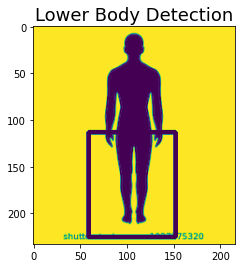

In [22]:
# Draw detections
for (x, y, w, h) in LowerBodyDetection:
    l = cv2.rectangle(human_template, (x, y), (x+w, y+h), (0, 0,255), 3)

plt.imshow(l)
plt.title("Lower Body Detection", fontsize= 18)
save_fig("Lower body detection")

In [23]:
# The detection was ideal

## Detection Using Neural Networks
In this case, the weights and architecture of neural networks are uploaded and used for our cases

## Caffe Face Detection

In [24]:
# Loading a Caffe model
net = cv2.dnn.readNetFromCaffe(source+"deploy.prototxt.txt",source+"res10_300x300_ssd_iter_140000_fp16.caffemodel")

In [25]:
# Loadin a tensorflow model
tf_net = net = cv2.dnn.readNetFromTensorflow(source+"opencv_face_detector_uint8.pb",source+"opencv_face_detector.pbtxt.txt")

In [26]:
image= cv2.imread("images/test2.jpg")
h, w, _ = image.shape

An important point is to actually get the names of the files right! Then adding them to the source location will load the model

In [27]:
# The Blob function performs preprocessing
# The blob resizes t0 300, 300 and performs a color subtraction
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), [104., 117., 123.], False,
False)


In [28]:
# Setting the input as blob - preprocessed image
net.setInput(blob)# Requires a normal image (B, G, R)
detections = net.forward() # for the detections

In [29]:
detections.shape

(1, 1, 200, 7)

In [30]:
# Iterating over all detections
output_image=image.copy()
detected_face = 0
for i in range(detections.shape[2]):
    # Getting the confidence intervals
    confidence = (detections[0, 0, i, 2])
    # Thresholding confidence, if greater than a threshold
    if confidence > 0.3:
        # Increasing the detected faces
        detected_face+=1
        # Getting the coordinates
        box = detections[0, 0, i, 3:7]*np.array([w, h, w, h]) # h and w are the dimensions of the pictre
        (startX, startY, endX, endY) = box.astype("int")
        
        # Drawing the rectange
        cv2.rectangle(output_image, (startX, startY), (endX, endY), (0, 0, 255), 3)


In [31]:
output_image.shape

(486, 640, 3)

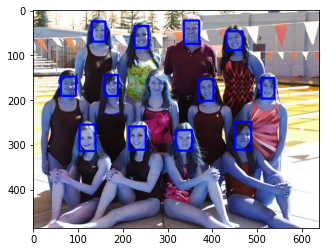

In [32]:
plt.imshow(output_image) # A good model with a low confidence lwvel
save_fig("Caffee multiple detection")

### Tensorflow Detection

In [33]:
# load the image 
image = cv2.imread("images/test2.jpg")
h, w, _ = image.shape # loading the dimesions

In [34]:
# Using Blob conversion
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), [104., 117., 123.], False,
False)

blob[0].shape

(3, 300, 300)

In [35]:
# A blob looks like a image subtracted version of original

In [36]:
# Reading a tensorflow COnvolutional Neural Network
tf_net =cv2.dnn.readNetFromTensorflow(source+"opencv_face_detector_uint8.pb",
                                             source+"opencv_face_detector.pbtxt.txt")

In [37]:
# Setting input for the network
tf_net.setInput(blob)
detections = tf_net.forward() # Calling detections

In [38]:
# Now running iterations and 
# marking those detections with high confidence
output_image = image.copy()
threshold  = 0.2
confidences = detections[0, 0, :, 2]
threshold_mask = (confidences>=threshold)
coordinates = detections[0, 0, threshold_mask, 3:7]*np.array([w, h, w, h])
for i in range(len(coordinates)):
    (startX, startY, endX, endY)=coordinates[i].astype(np.int16)
    cv2.rectangle(output_image, (startX, startY), (endX, endY), (0, 0, 255), 3)

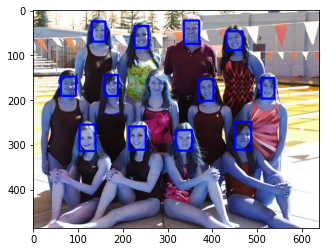

In [39]:
plt.imshow(output_image)
save_fig("TensorFlow multiple detection")

In [40]:
# Creating a neural network detection function 
def show_dnn_detection(show_image, show_detections, threshold = 0.7):
    """
    This function takes in the detections computed by NET.forward() function 
    by a nueral net model in OpenCV and plots the detections
    """
    # Copying the image
    out = show_image.copy()
    (h_, w_) = out.shape[:2]
    # Filtering the coordintes of rectangeles below threshold
    confidences = show_detections[0, 0, :, 2]
    mask = (confidences >= threshold)
    # Plotting rectangles
    coordinates = show_detections[0, 0, mask, 3:7]*np.array([w_, h_, w_, h_])
    for i in range(len(coordinates)):
        (startX, startY, endX, endY) = coordinates[i].astype(np.int16)
        cv2.rectangle(out, (startX, startY), (endX, endY), (0, 0, 255), 3)
        
    return out

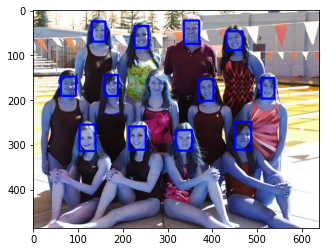

In [41]:
output = show_dnn_detection(image.copy(), detections, 0.2)
plt.imshow(output)# You could also print confidence aong with this
save_fig("Caffee multiple detection")

## DLIB Face Detector
The detection occurs through HOG method - Histogram of Gradients method in this case.
**Most importantly, this Detector can be used to Detect other spot objects too!**
* Visit this website - http://dlib.net/train_object_detector.py.html
* Or visit Stackoverflow

In [42]:
# loading an image
image = cv2.imread('images/test1.jpg')

In [43]:
# Loading the DLIB Svm detector
detector = dlib.get_frontal_face_detector()

In [44]:
# Using the detector to detect faces
rects_1 = detector(image, 0)
rects_2 = detector(image, 1)

## CNN method

In [45]:
# Useful functions
def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(1, 1, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')

def show_cnn_detection(image, faces):
    """Draws a rectangle over each detected face"""
    # faces contains a list of mmod_rectangle objects
    # The mmod_rectangle object has two member variables, a dlib.rectangle object,
    # and a confidence score
    # Therefore, we iterate over the detected mmod_rectangle objects accessing
    #dlib.rect to draw the rectangle
    for face in faces:
        cv2.rectangle(image, (face.rect.left(), face.rect.top()), (face.rect.right(),
            face.rect.bottom()), (255, 0, 0), 10)
    return image



In [46]:
cnn_face_detector = dlib.cnn_face_detection_model_v1(source+"mmod_human_face_detector.dat")


In [47]:
# Runnign the CNN
rects = cnn_face_detector(image, 2)

In [48]:
img_faces = show_cnn_detection(image.copy(), rects)

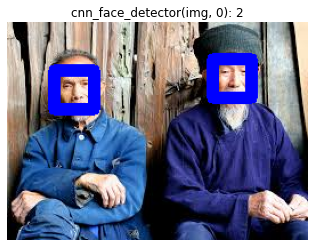

In [49]:
show_img_with_matplotlib(img_faces, "cnn_face_detector(img, 0): " + str(len(rects)), 1)
save_fig("CNN multiple detection")

## Face Detection using face_recognition
Face Detection requires an RGB image - not the opencv BGR image

### Face Recognition HOG

In [50]:
# Show HOG function 
def show_hog_detection(image, faces):
    """Draws a rectangle over each detected face
        for a HOG detector
    """

    for face in faces:
        top, right, bottom, left = face
        cv2.rectangle(image, (left, top), (right, bottom), (255, 0, 0), 10)
    return image


In [51]:
# Image
image = cv2.imread("images/test1.jpg")
rbg = image[:, :,::-1]

In [52]:
# Detecting faces
# Returns Rectangles
rects1 = face_recognition.face_locations(rbg.copy(), 0, "hog")
rects2 = face_recognition.face_locations(rbg.copy(), 1, "hog")

In [53]:
# Using the show_cnn function to return the rectangles
import cv2
hog_image = show_hog_detection(image.copy(), rects1)
hog_image_2 = show_hog_detection(image.copy(), rects2)

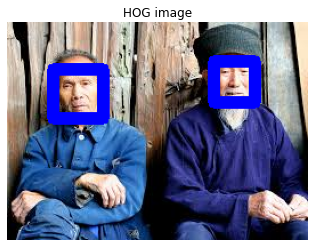

In [54]:
# Display using the display function 
show_img_with_matplotlib(hog_image_2, "HOG image", 1)
save_fig("HOG imgere")

### Face Recognition and CNN

In [55]:
image = cv2.imread("images/test1.jpg")
rgb = image[:, :, ::-1]

In [56]:
# Calling a cnn 
rects3 = face_recognition.face_locations(rgb.copy(), 0, "cnn")
rects4 = face_recognition.face_locations(rgb.copy(), 2, "cnn")

In [57]:
for face in rects4:
    top, right, bottom, left = face
    display = cv2.rectangle(rgb.copy(), (top, left), (bottom, right), (0, 0, 255), 5)

In [58]:
hog_image = show_hog_detection(rgb.copy(), rects1)
hog_image_2 = show_hog_detection(rgb.copy(), rects2)

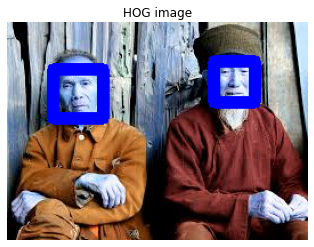

In [59]:
show_img_with_matplotlib(hog_image_2, "HOG image", 1)
save_fig("HOG_image_2")

### Face Recognition using CVLIB
This uses a trained DNN model (Caffe) model to execute the function 

In [60]:
# Face Detect 
import cvlib as cv
faces, confidences = cv.detect_face(rgb.copy()) # Takes time - Neural Network

In [61]:
display = rgb.copy()
for face in faces:
    left, top,right, bottom = face
    display = cv2.rectangle(display, (left, top), (right, bottom), (0, 255, 0), 5)

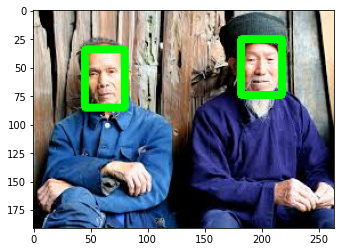

In [62]:
plt.imshow(display)
save_fig("CVLib")

In [63]:
# Successfull shown 

### Reflection 
It is understood that Face Detection can take place using opencv, dlib, cvlib and face_recognition libraries. Some functionalities in these modules overlap and on a global scale use the following set of algorithms - 
* 1) HaarsCascadeClassifier - which loads a state-of-the art classifier
* 2) SVM recognition algorithmm - which comes up in dlib
* 3) Deep Neural Networks - which are loaded from files (Caffe/Tensorflow) in opencv library
* 4) Convolutional Neural Networks - which are used in the dlib algorithm - also covered in the face_recognition
* 5) CVLIB - high level api for detection (but others are prefereable for optimization)

* *Haars Cascade Classifiers could be used to load classifiers for lower body and so on* 

# Face Tracking
Face Tracking is performed using the DLIB DCF tracker. At first, the tracter must be given the coordinates of the object which it is tracking. After this, the tracker auto pilots tracking process.

In [64]:
import winsound

In [65]:
# Initializing the face tracker
# Haars Cascade
haar = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_alt2.xml")

In [66]:
# Initializing tracker
tracker= dlib.correlation_tracker()

In [67]:
# Function 
def draw_text_info(tracking_face):
    """Draw text information"""

    # We set the position to be used for drawing text and the menu info:
    menu_pos_1 = (10, 20)
    menu_pos_2 = (10, 40)

    # Write text:
    cv2.putText(frame, "Use '1' to re-initialize tracking", menu_pos_1, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255))
    if tracking_face:
        cv2.putText(frame, "tracking the face", menu_pos_2, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0))
    else:
        cv2.putText(frame, "detecting a face to initialize tracking...", menu_pos_2, cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    (0, 0, 255))

In [68]:
no_keys = 6

# Now Detecting and trackign a face
# initializing the tracker 
tracker = dlib.correlation_tracker()
# Initializing the detector 
face_detector = dlib.get_frontal_face_detector()
haar = cv2.CascadeClassifier(source+"haarcascade_frontal_face_alt2.xml")
# Setting the variable to False
track_face = False
# Initilizing the live feed
capture=cv2.VideoCapture(0)

while True:
    
    # Reading 
    ret, frame = capture.read()
    # Text
    draw_text_info(track_face)
    22
    if track_face == False:
        gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        rects = face_detector(gray)
        if len(rects)>0:
            tracker.start_track(frame, rects[0])
            track_face = True
    
    # Tracking Face
    if track_face==True:
        tracker.update(frame) # Printing the confidences
        pos = tracker.get_position()
        cv2.rectangle(frame, (int(pos.left()), int(pos.top())), (int(pos.right()), int(pos.bottom())), (0, 255, 0), 3)
        # Print the category 
        #center = int((pos.right()+pos.left())/2)
        #category_number = decide_category(center, frame, no_keys)
        #track_locations.append(category_number)
        #play_audio(category_number)
        
    
    # Wait Key 
    key = 0xFF & cv2.waitKey(15)
    if key == 27:
        break
    if key == ord("1"):
        track_face = False
        
    # SHowing the image 
    cv2.imshow("Face Tracking using DCF",frame)
   
        
        
    
capture.release()
cv2.destroyAllWindows()

## Object Tracking

In [69]:
# importing modules
import cv2
import dlib

In [70]:
# Now creating the help functions 
def draw_text_info(frame, status):
    """This function draws the requried text in the window
    """
    # Positions of text
    menu_pos_1 = (10, 20)
    menu_pos_2 = (10, 40)
    menu_pos_3 = (10, 60)
    
    # Display information 
    info1 = "Enter 1 to start tracking the object"
    info2 = "Enter 2 to re-start the tracking process"
    info3 = "Tracking the object"
    info4 = "Looking for the object"
    
    # Writing thetext
    cv2.putText(frame,info1,menu_pos_1,cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255, 255, 255) )
    cv2.putText(frame, info2, menu_pos_2, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0))
    if status == True:
        cv2.putText(frame, info3, menu_pos_3, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0))
    else:
        cv2.putText(frame, info4, menu_pos_3, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))
        

# This is the mouse callback function:
def mouse_event_handler(event, x, y, flags, param):
    """This function handles the mouse event taking place in the program"""
    # references to the global points variable
    global points

    # If left button is click, add the top left coordinates of the object to be tracked:
    if event == cv2.EVENT_LBUTTONDOWN:
        points = [(x, y)]

    # If left button is released, add the bottom right coordinates of the object to be tracked:
    elif event == cv2.EVENT_LBUTTONUP:
        points.append((x, y))

### Comparison of Different Face Recognition Models

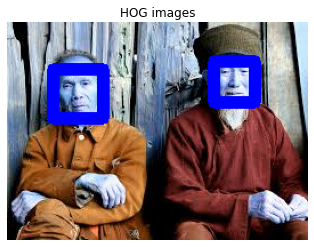

In [71]:
images = [hog_image_2,
          img_faces,
          display
          ]
titles = ["HOG images", "CNN face detector", "CVLib"]
show_img_with_matplotlib(images[0], titles[0], 1)

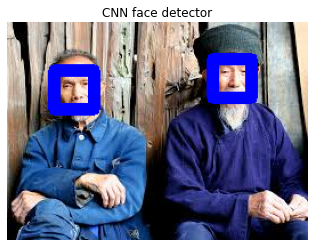

In [72]:
# CNN detector
show_img_with_matplotlib(images[1], titles[1], 1)

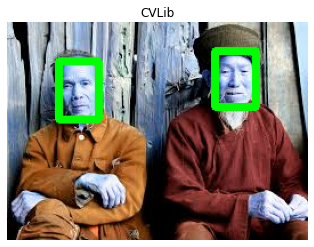

In [73]:
# CVlib
show_img_with_matplotlib(images[2], titles[2], 1)

There are minor differences between all the three face detectors. The edges of the rectanges vary a bit in all of the three cases. 